I have a universe machine catalog, gonna compute statistics on them now & make sure everything seems sensible. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import numpy as np

In [3]:
cat = np.load('/home/users/swmclau2/scratch/UniverseMachine/cut_um_catalog.npy')

In [4]:
cat.dtype

dtype([('id', '<i8'), ('descid', '<i8'), ('upid', '<i8'), ('flags', '<i4'), ('uparent_dist', '<f4'), ('pos', '<f4', (6,)), ('vmp', '<f4'), ('lvmp', '<f4'), ('mp', '<f4'), ('m', '<f4'), ('v', '<f4'), ('r', '<f4'), ('rank1', '<f4'), ('rank2', '<f4'), ('ra', '<f4'), ('rarank', '<f4'), ('A_UV', '<f4'), ('sm', '<f4'), ('icl', '<f4'), ('sfr', '<f4'), ('obs_sm', '<f4'), ('obs_sfr', '<f4'), ('obs_uv', '<f4'), ('empty', '<f4')])

In [5]:
pos = cat['pos'][:, :3]

In [6]:
np.min(pos, axis = 0), np.max(pos, axis = 0)

(array([ -6.88299561e+00,  -8.28417969e+00,   3.82649712e-03], dtype=float32),
 array([  999.96655273,  1000.0958252 ,   999.99926758], dtype=float32))

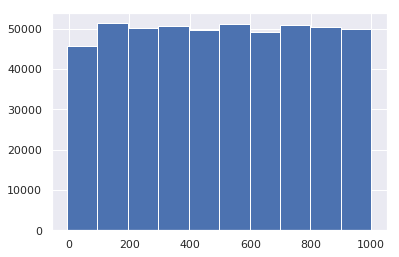

In [7]:
plt.hist(pos[:,0]);

In [8]:
sm = cat['sm']

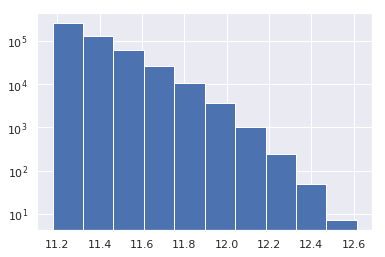

In [9]:
plt.hist(np.log10(sm));
plt.yscale('log')

In [10]:
halo_mass = cat['m']

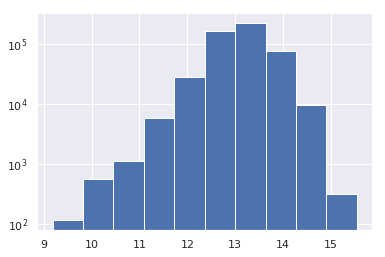

In [11]:
plt.hist(np.log10(halo_mass));
plt.yscale('log')

In [12]:
np.log10(np.mean(halo_mass))

13.476647

In [13]:
cat.sort(order = 'm')

In [14]:
cat[:10]['sm'], cat[:10]['m']

(array([  1.81174125e+11,   1.87193999e+11,   1.67929577e+11,
          1.62950857e+11,   1.50957294e+11,   1.65646156e+11,
          1.96991861e+11,   1.55666809e+11,   1.54666861e+11,
          1.54943734e+11], dtype=float32),
 array([  1.52699392e+09,   1.59566054e+09,   1.95193728e+09,
          1.96046694e+09,   1.97767117e+09,   2.01989696e+09,
          2.12902259e+09,   2.29514650e+09,   2.41413939e+09,
          2.46946586e+09], dtype=float32))

In [15]:
from halotools.mock_observables import tpcf

In [16]:
?? tpcf

In [17]:
rbins = np.logspace(-1.1, 1.6, 19)

In [18]:
xi_gg = tpcf(pos/0.7, rbins, period = 1000.0/0.7, estimator = 'Landy-Szalay')

In [19]:
rpoints = (rbins[1:] + rbins[:-1])/2.0

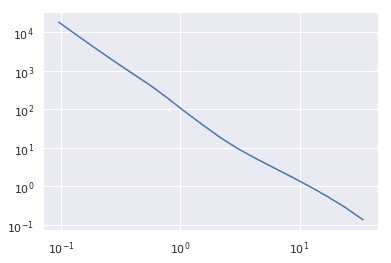

In [20]:
plt.plot(rpoints, xi_gg)
plt.loglog();